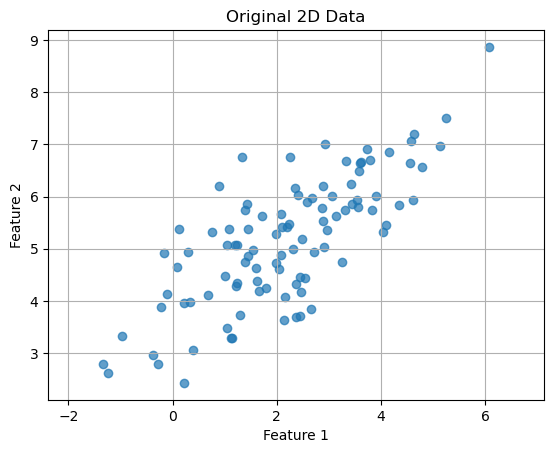

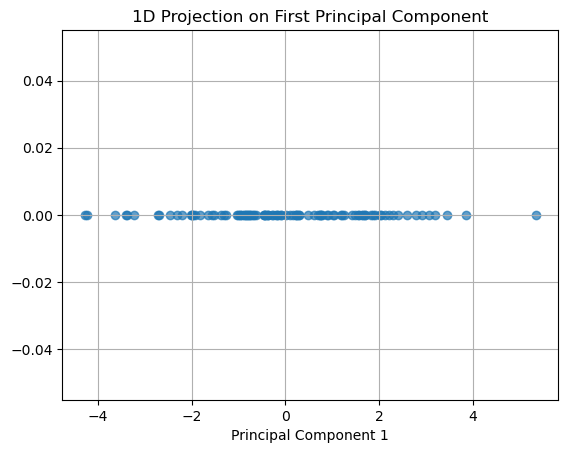

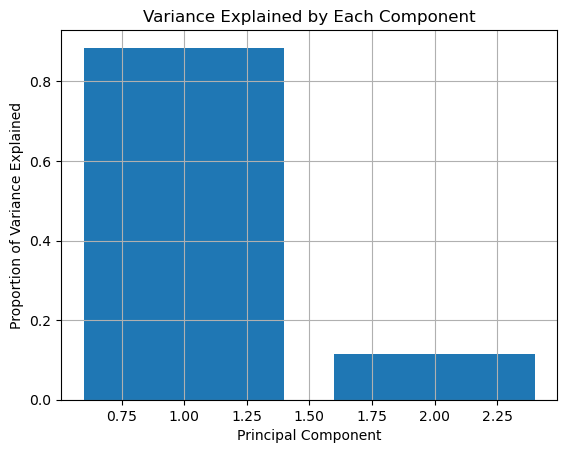

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate a 2D dataset
np.random.seed(42)
X = np.random.multivariate_normal(mean=[2, 5], cov=[[3, 2], [2, 2]], size=100)

# Step 2: Plot the original 2D data
plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
plt.title("Original 2D Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.axis("equal")
plt.grid(True)
plt.show()

# Step 3: Center the data
X_centered = X - np.mean(X, axis=0)

# Step 4: Covariance matrix
cov_matrix = np.cov(X_centered.T)

# Step 5: Eigen decomposition
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

# Step 6: Project data onto first principal component
projected = X_centered @ eig_vecs[:, 0]

# Step 7: Plot 1D projection
plt.scatter(projected, np.zeros_like(projected), alpha=0.7)
plt.title("1D Projection on First Principal Component")
plt.xlabel("Principal Component 1")
plt.grid(True)
plt.show()

# Step 8: Variance explained
explained_variance = eig_vals / np.sum(eig_vals)
plt.bar(range(1, len(eig_vals)+1), explained_variance)
plt.title("Variance Explained by Each Component")
plt.xlabel("Principal Component")
plt.ylabel("Proportion of Variance Explained")
plt.grid(True)
plt.show()


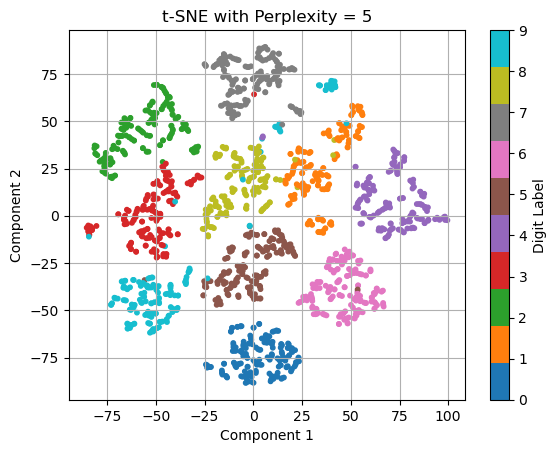

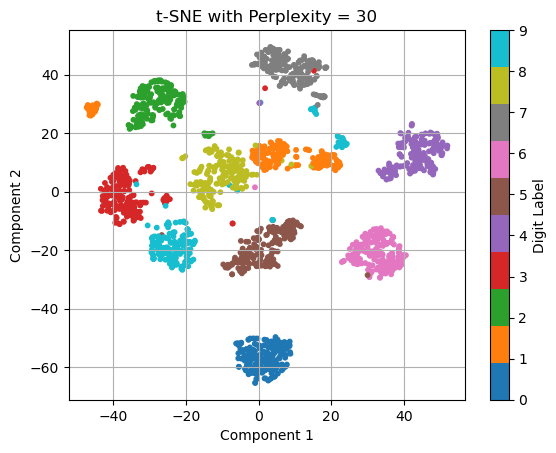

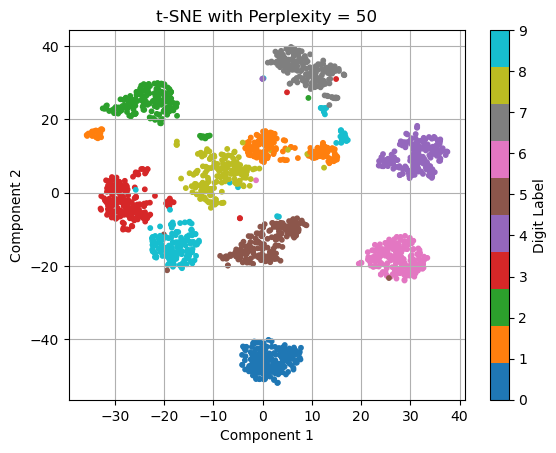

In [3]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

digits = load_digits()
X, y = digits.data, digits.target  # X shape: (1797, 64), y shape: (1797,)

# Inspect the shape of X and y
print("Shape of X,y:", X.shape)

# Try t-SNE with different perplexity values
for perplexity in [5, 30, 50]:
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X)

    plt.figure()
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', s=10)
    plt.title(f"t-SNE with Perplexity = {perplexity}")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.colorbar(label="Digit Label")
    plt.grid(True)
    plt.show()
